In [58]:
#importam llibreries
import numpy as np
import matplotlib.pyplot as plt

FUNCTIONS

In [59]:
def perturbation(t,to,F,sigma):
    return F*np.exp(-(t-to)**2/(2*sigma**2))

In [60]:
def no_perturbation(t,to,F,sigma):
    return 0

In [61]:
def RHS_Vanderpol(t,w,parameters): #eqs Vanderpol
    v = w[1]
    x = w[0]
    f_x = v 
    mu = parameters[0]
    f_v =  mu*(1-x**2)*v - x
    return np.array([f_x,f_v])

In [62]:
def RHS_FHN(t,w,par,func,F): #eqs FHN
    sigma=1
    to=5*sigma
    y = w[1]
    x = w[0]
    a = par[0]
    eps = par[1]
    f_x = x- x**3/3 - y + func(t,to,F,sigma)
    f_y = eps*(x-a) 
    return np.array([f_x,f_y])

In [63]:
def rk(func,parameters, K_pasos, Samp, t_i, w_i, b,F):  #funció que fa RK i torna el resultat i els vectors
    h = parameters[-1]
    t = t_i
    w = w_i  
    TR = np.zeros(((len(w)+1), int(np.ceil(K_pasos/Samp))))  #matriu buida amb columnes per a cada vector i el temps i files depenent de la relació entre passes i les que volem guardar
    i = 0  #contador
    if b==0: #No perturbation
        for j in range(0,K_pasos):
            k1 = h * func(t,w,parameters,no_perturbation,F)                     #RK 2n ordre
            k2 = h * func(t + h/2, w + k1/2,parameters,no_perturbation,F)

            t = t + h
            w = w + k2 

            if j % Samp == 0:   #if the remainder is 0, guardam els vectors a la seva columna
                TR[0,i] = t  
                TR[1,i] = w[0]
                TR[2,i] = w[1]
                i += 1
    else: #Perturbation
        for j in range(0,K_pasos):
            k1 = h * func(t,w,parameters,perturbation,F)                     #RK 2n ordre
            k2 = h * func(t + h/2, w + k1/2,parameters,perturbation,F)

            t = t + h
            w = w + k2 

            if j % Samp == 0:   #if the remainder is 0, guardam els vectors a la seva columna
                TR[0,i] = t  
                TR[1,i] = w[0]
                TR[2,i] = w[1]
                i += 1
    return TR , w , t #torna la matriu i els vectors

Parameters and initial conditions

In [64]:
a=-1.1
eps = 0.01 #epsilon
h = 0.01   #pas 

K_pasos1 = int(5e4)
K_pasos2 = int(K_pasos1)   
Samp = 10 #cada quant volem guardar
t_i = 0 #temps inicial

#He puesto como condiciones inciales los valores que anulan fx y fy (es decir, el punto de equilibrio)
x_i = -1.1 
y_i = -0.6563

#good for xxxx valors inicials (put ic 1,0.6 closet to SS for a=1)
#x_i = 1 
#y_i = 0.6 


w_i = np.array([x_i,y_i]) #vector amb els valors inicials

F_list=np.linspace(0.1,0.3,200)

Runge-Kutta second order

In [65]:
parameters = np.array([a , eps, h])  #vector amb els paràmetres a, epsilon i h
x_max=np.zeros(len(F_list))
c = 0 #contador
for F in F_list: 
    #bucle per a que faci el càlcul per a cada F
    [TR , w_1, t_1] = rk(RHS_FHN, parameters, K_pasos1 , Samp, t_i ,w_i,b=0,F=F)    #matriu i vector resultants dels valors inicials
    [TR , w_2, t_2] = rk(RHS_FHN, parameters, K_pasos2 , Samp, t_i ,w_1,b=1,F=F)    #torna a fer RK però començant on a acabat l'altre i amb una k diferent
    w_i = w_2 #per a la següent a comença on ha acabat l'anterior #matriu i vector resultants dels valors inicials
    x_max[c]=np.max(TR[1])
    c = c + 1


"""
Ponemos t_i=0 en ambos rk. Nuestras condiciones de contorno son muy cercanas al punto de equilibrio y luego corremos un runge-kutta para asegurarnos de que sí o sí esté ya en el equiibrio. Acto seguido cogemos el punto final del primer
runge-kutta y lo ponemos en el segundo y corremos la simulación con una perturbación.
"""

'\nPonemos t_i=0 en ambos rk. Nuestras condiciones de contorno son muy cercanas al punto de equilibrio y luego corremos un runge-kutta para asegurarnos de que sí o sí esté ya en el equiibrio. Acto seguido cogemos el punto final del primer\nrunge-kutta y lo ponemos en el segundo y corremos la simulación con una perturbación.\n'

Nullclines 

In [66]:
# graficar la recta i la cúbica
Y = np.zeros(100)
X = np.zeros(100)
i  = 0
linx = np.linspace(-2.5,2.5,100)
liny = np.linspace(-6,6,100) 
for x in linx:
    y = x-x**3/3
    Y[i] = y
    X[i] = a
    i+=1     

Flowlike graph with arrows

In [67]:
x_array_arrow=np.linspace(-2.5,2.5,12)
y_array_arrow=np.linspace(-6,6,12)


#x_array_arrow=np.linspace(-2.5,2.5,128)
#y_array_arrow=np.linspace(-6,6,128)


x_grid_arrow, y_grid_arrow = np.meshgrid(x_array_arrow, y_array_arrow)


PLOTTING

In [68]:
%matplotlib widget

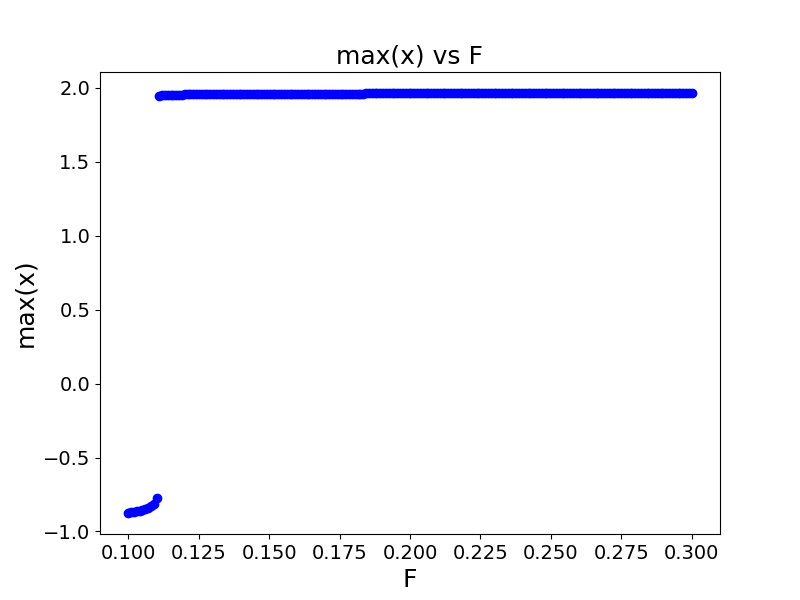

In [70]:
fig, ax = plt.subplots(figsize=(8,6))
c=0
for F in F_list:
    ax.scatter(F,x_max[c], color='blue', label = 'F=' + str(F)[:6])
    c+=1
ax.grid(False)
ax.set_ylabel('max(x)', fontsize=18)
ax.set_xlabel('F',fontsize=18)
ax.ticklabel_format(style='sci',scilimits=(-4,-4),axis='x',useMathText=True)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.3f}'))  # Limita a 2 dígitos decimales
ax.set_title('max(x) vs F',fontsize=18)
ax.tick_params(axis='y', labelsize=14) 
ax.tick_params(axis='x', labelsize=14)

plt.show()